<a href="https://colab.research.google.com/github/ArMi1407/Consumo-de-gas-Argentina/blob/main/EDA_Gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación y carga
## Se importan las bibliotecas:
- Pandas: Manipulación y visualización de los datos
- Numpy: Generar Arrays
- Mathplot: Para generar gráficos
- Seaborn: Para generar y estilizar gráficos
- Plotly: Para generar gráficos interactivos

##Carga de datos:
El dataframe a analizar resulta del csv tratado en el ETL

In [3]:
#Carga de librerias
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
#Cargo los datos como un dataframe denominado df_gas
df_gas= pd.read_csv('/content/df_final_merge.csv')

# Exploración del dataframe

In [5]:
"""Muestro la información del dataset: La cantidad de entradas, columnas y sus
respectivos nombres, registros no nulos por columa y el tipo de dato.
Además se visualizan los primeros y últimos 5 registros del dataset"""
display(df_gas.info(), df_gas.head(), df_gas.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indice_tiempo           1380 non-null   object 
 1   provincia               1380 non-null   object 
 2   temp_promedio           1380 non-null   float64
 3   estacion                1380 non-null   object 
 4   gdc                     1380 non-null   float64
 5   produccion_gas_natural  1380 non-null   float64
 6   total                   1380 non-null   float64
 7   residencial             1380 non-null   float64
 8   Otros sectores          1380 non-null   float64
dtypes: float64(6), object(3)
memory usage: 97.2+ KB


None

,indice_tiempo,provincia,temp_promedio,estacion,gdc,produccion_gas_natural,total,residencial,Otros sectores
0,2019-01-01,bsas,18.450000,Verano,0.00,4000.194452,3267.863,306.257,2803.244
1,2019-02-01,bsas,19.000000,Verano,0.00,3770.580137,3147.144,277.859,2730.473
2,2019-03-01,bsas,16.791667,Otoño,36.25,4014.104313,3284.154,405.178,2612.954
3,2019-04-01,bsas,17.200000,Otoño,24.00,3948.832523,3279.103,498.612,2472.052
4,2019-05-01,bsas,17.333333,Otoño,20.00,4245.779178,3879.933,958.250,2662.565


,indice_tiempo,provincia,temp_promedio,estacion,gdc,produccion_gas_natural,total,residencial,Otros sectores
1375,2023-08-01,tucuman,19.120000,Invierno,0.0,4477.024219,4469.913,1445.818,2791.544
1376,2023-09-01,tucuman,24.550000,Primavera,0.0,4296.923314,4014.886,1191.804,2621.116
1377,2023-10-01,tucuman,19.066667,Primavera,0.0,3905.392633,3456.851,735.477,2369.841
1378,2023-11-01,tucuman,20.228571,Primavera,0.0,3789.920718,3364.695,551.415,2519.332
1379,2023-12-01,tucuman,22.366667,Verano,0.0,3539.010723,3163.924,383.230,2533.824


#Exploración numérica

In [6]:
#Descripción estadística
df_gas.describe()


,temp_promedio,gdc,produccion_gas_natural,total,residencial,Otros sectores
count,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000
mean,18.220289,45.454010,3939.549331,3627.444283,811.642817,2557.096100
std,4.430882,91.816559,278.035513,498.777793,485.659915,213.099384
min,4.466667,0.000000,3208.218315,2862.707000,277.042000,2069.348000
25%,16.402083,0.000000,3780.068430,3263.030250,358.907500,2394.311000
50%,18.769697,0.000000,3938.483944,3467.965000,706.660000,2559.080500
75%,21.057440,47.937500,4140.093290,3930.388250,1272.272000,2708.033500
max,30.200000,406.000000,4477.107179,4737.218000,1770.069000,3002.124000


In [7]:
#Cuartiles, rango IQ y valores max y min de las columnas numéricas
num = df_gas.select_dtypes(include=['float64', 'int64'])
for col in num.columns:
    print(f"Columna: {col}")
    print(f"Cuartiles: {num[col].quantile([0.25, 0.5, 0.75])}")
    print(f"Rango intercuartil (IQR): {num[col].quantile(0.75) - num[col].quantile(0.25)}")
    print(f"Valor máximo: {num[col].max()}")
    print(f"Valor mínimo: {num[col].min()}")
    print("\n")

Columna: temp_promedio
Cuartiles: 0.25    16.402083
0.50    18.769697
0.75    21.057440
Name: temp_promedio, dtype: float64
Rango intercuartil (IQR): 4.655357142857142
Valor máximo: 30.2
Valor mínimo: 4.466666666666667


Columna: gdc
Cuartiles: 0.25     0.0000
0.50     0.0000
0.75    47.9375
Name: gdc, dtype: float64
Rango intercuartil (IQR): 47.937499999999964
Valor máximo: 406.0
Valor mínimo: 0.0


Columna: produccion_gas_natural
Cuartiles: 0.25    3780.068430
0.50    3938.483944
0.75    4140.093290
Name: produccion_gas_natural, dtype: float64
Rango intercuartil (IQR): 360.0248602749962
Valor máximo: 4477.107178500004
Valor mínimo: 3208.2183149


Columna: total
Cuartiles: 0.25    3263.03025
0.50    3467.96500
0.75    3930.38825
Name: total, dtype: float64
Rango intercuartil (IQR): 667.3580000000002
Valor máximo: 4737.218
Valor mínimo: 2862.707


Columna: residencial
Cuartiles: 0.25     358.9075
0.50     706.6600
0.75    1272.2720
Name: residencial, dtype: float64
Rango intercuartil (

###Gráficos de variables numéricas

In [8]:
#Boxplot interactivo de las columnas numéricas
fig = px.box(df_gas, x=num.columns, title='Boxplot de las columnas numéricas', color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title='Columnas', yaxis_title='Valores', showlegend=True)
fig.show()

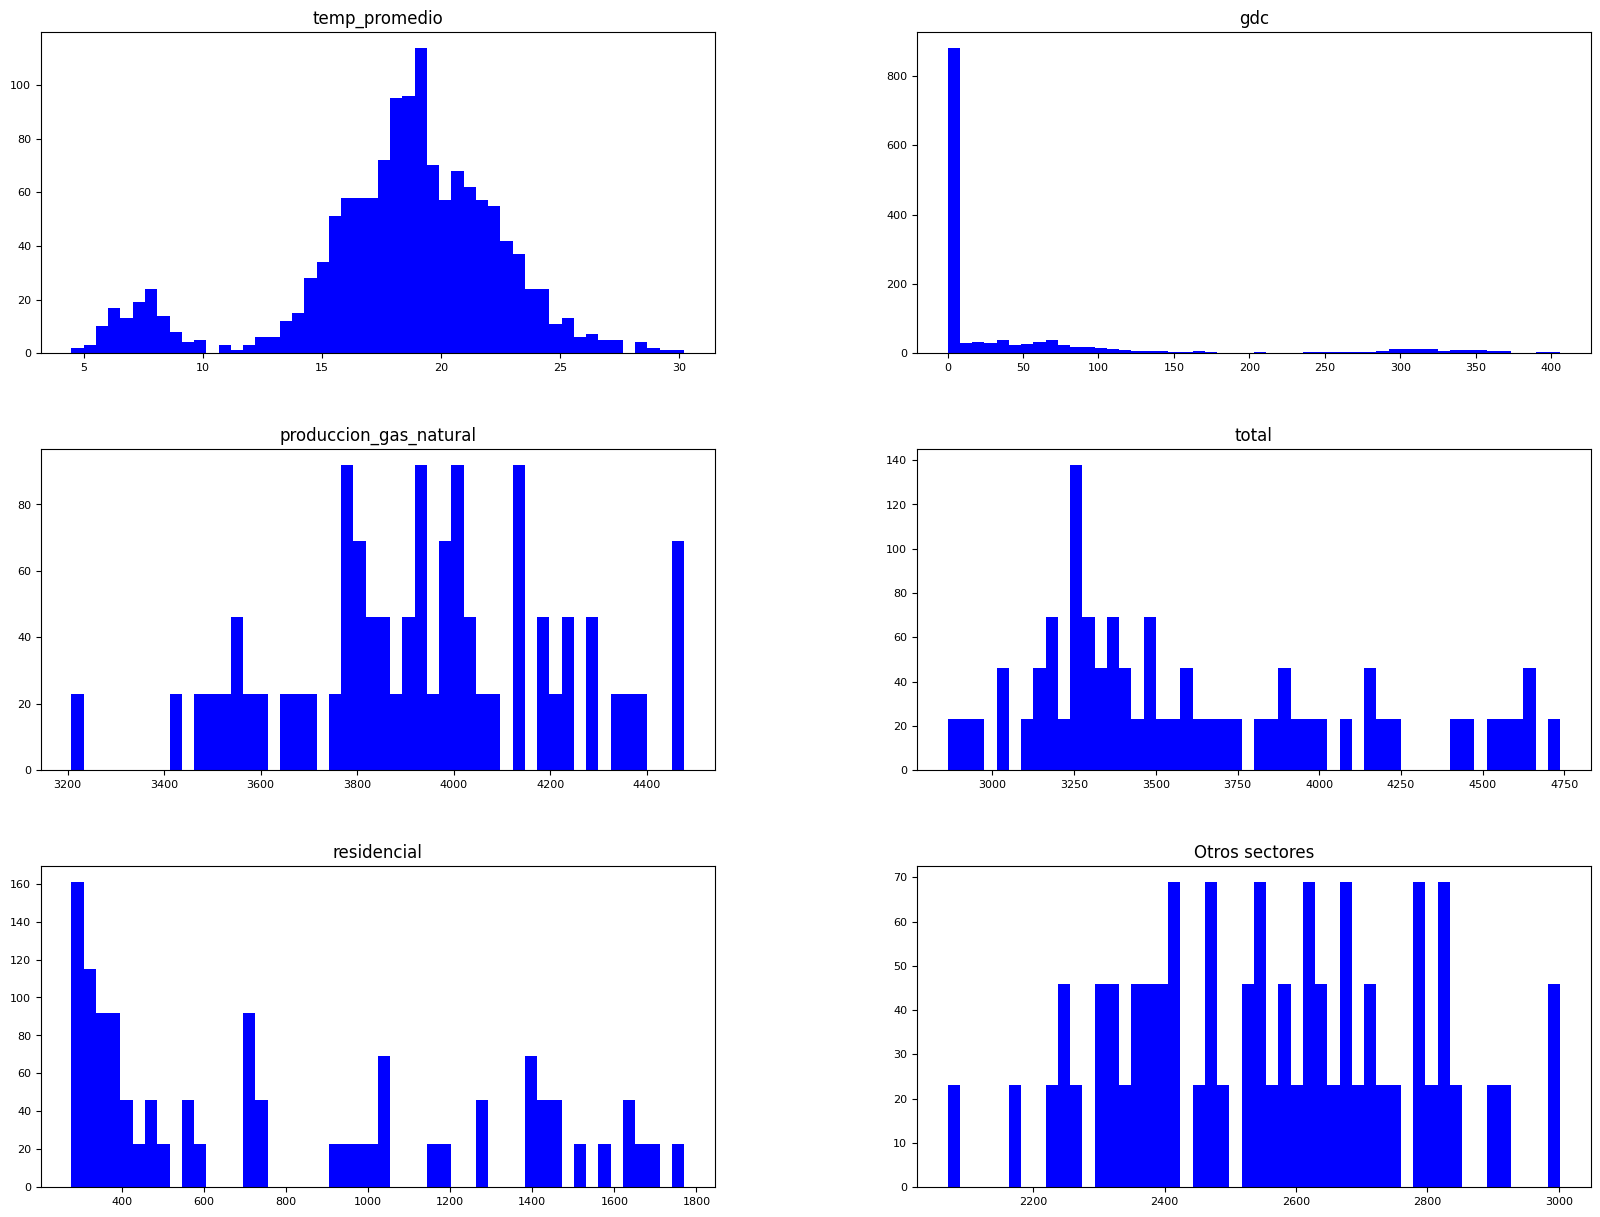

In [9]:
#Histograma de cada columna numérica
df_gas.hist(figsize=(20,15), bins=50, xlabelsize=8, ylabelsize=8, grid=False, color='blue')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has b

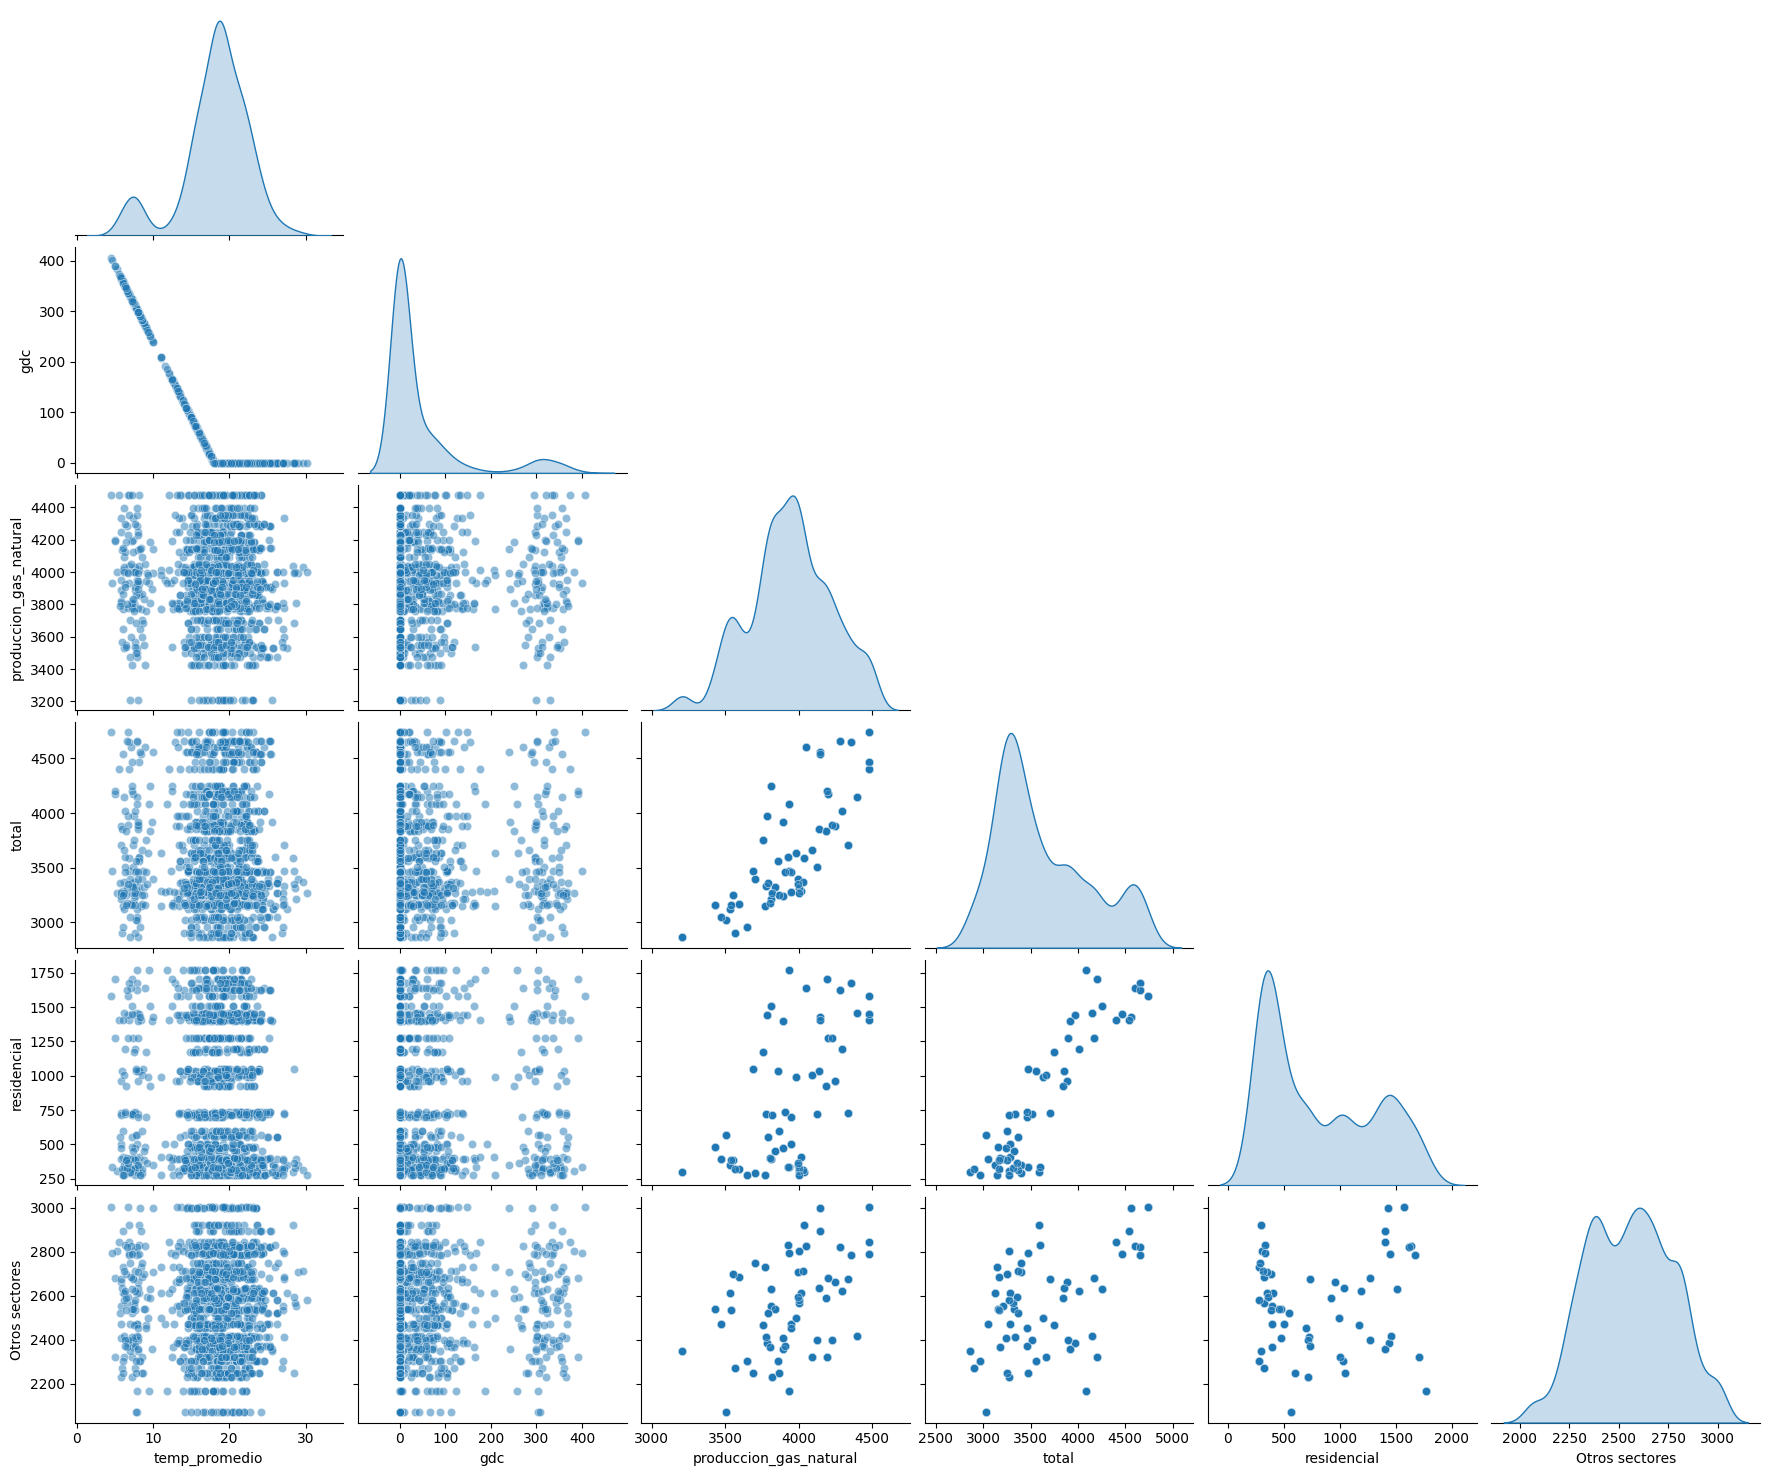

In [10]:
#Dispersión
sns.pairplot(df_gas, diag_kind='kde', corner=True, palette='Set1', height=2.5, aspect=1.2, plot_kws={'alpha': 0.5})
plt.show()

#Exploración categórica

In [11]:
#Muestro los valores únicos de cada categoría
display(
    df_gas['provincia'].unique(),
    df_gas['estacion'].unique(),
)

array(['bsas', 'catamarca', 'chaco', 'chubut', 'cordoba', 'corrientes',
       'entre_rios', 'formosa', 'jujuy', 'la_pampa', 'la_rioja',
       'mendoza', 'misiones', 'neuquen', 'r_negro', 'salta', 'sanjuan',
       'sanluis', 'santafe', 'sta_cruz', 'stgo_del_estero', 't_d_fuego',
       'tucuman'], dtype=object)

array(['Verano', 'Otoño', 'Invierno', 'Primavera'], dtype=object)

In [12]:
#Mostrar cantidad de valores pertenecientes a las categorías de una columna
display(
    df_gas['provincia'].value_counts(sort=True),
    df_gas['estacion'].value_counts(sort=True),
)

,count
provincia,
bsas,60
catamarca,60
chaco,60
chubut,60
cordoba,60
corrientes,60
entre_rios,60
formosa,60
jujuy,60


,count
estacion,
Verano,345
Otoño,345
Invierno,345
Primavera,345


#Análisis con gráficos

In [19]:
#Este gráfico permite visualizar si la producción nacional cubre el consumo total
fig = go.Figure(data=[
    go.Bar(name='Producción destinada provincial', x=df_gas['provincia'], y=df_gas['produccion_gas_natural']),
    go.Bar(name='Consumo Total provincial', x=df_gas['provincia'], y=df_gas['total'])
])
fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Producción vs Consumo ')
fig.show()

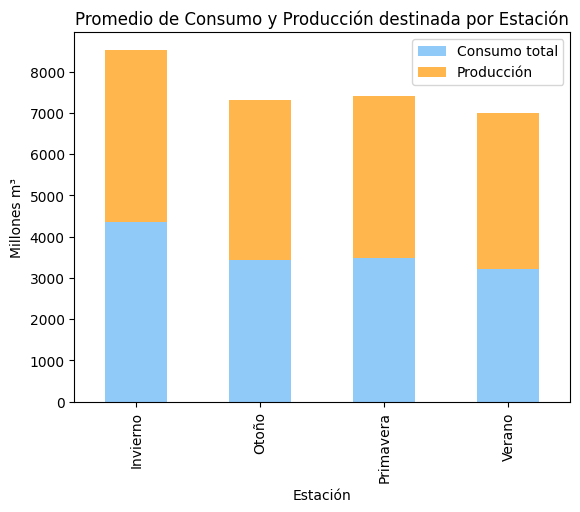

In [30]:
df_bar = df_gas.groupby('estacion')[['total','produccion_gas_natural']].mean().reset_index()
df_bar.plot(kind='bar', x='estacion', stacked=True, color=['#90caf9','#ffb74d'])
plt.title('Promedio de Consumo y Producción destinada por Estación')
plt.ylabel('Millones m³')
plt.xlabel('Estación')
plt.legend(['Consumo total','Producción'])
plt.show()

/tmp/ipython-input-2876057436.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



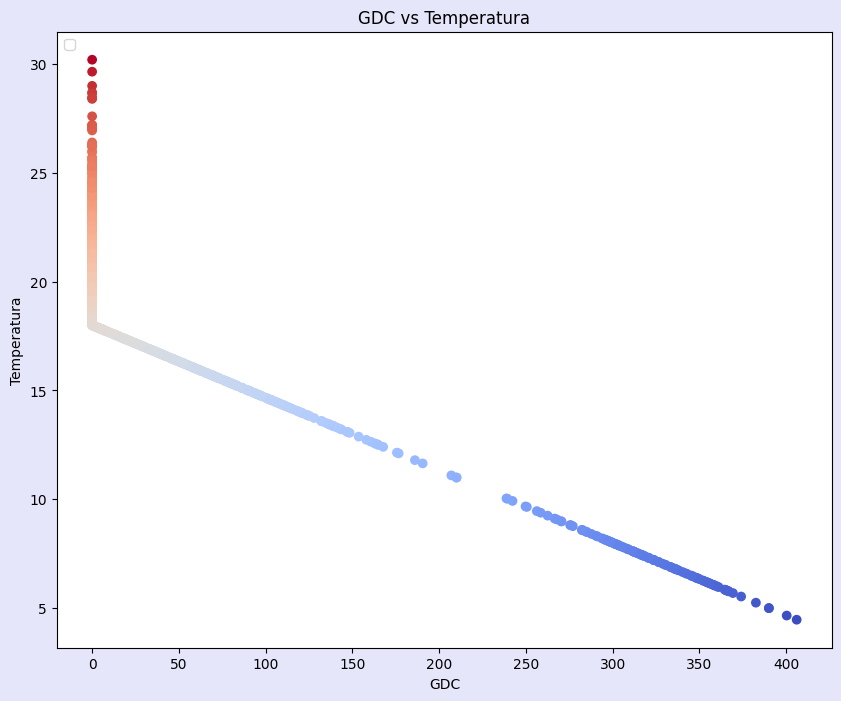

In [20]:
#Serie temporal GDC vs Temperatura por provincia
plt.scatter(df_gas['gdc'], df_gas['temp_promedio'], c=df_gas['temp_promedio'], cmap='coolwarm')
plt.xlabel('GDC')
plt.ylabel('Temperatura')
plt.title('GDC vs Temperatura')
fig=plt.gcf()
fig.set_size_inches(10, 8)
fig.patch.set_facecolor('lavender')
plt.legend(loc='upper left')
plt.show()

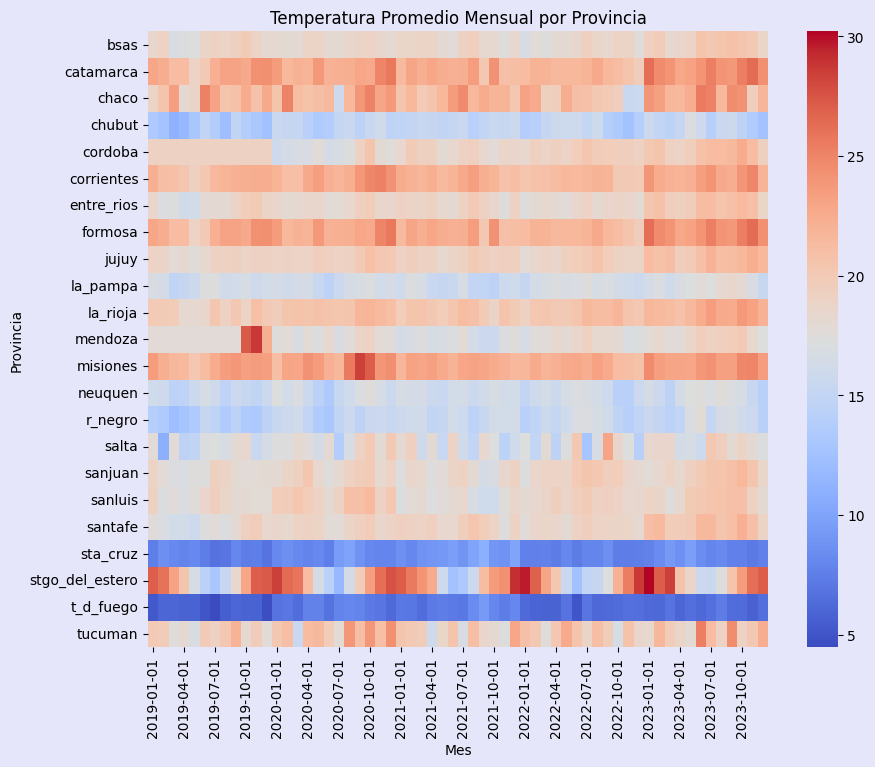

In [23]:
#Heatmap mensual (Provincia VS Mes)
sns.heatmap(df_gas.groupby(['provincia', pd.Grouper(key='indice_tiempo')])['temp_promedio'].mean().unstack(), cmap='coolwarm')
plt.xlabel('Mes')
plt.ylabel('Provincia')
plt.title('Temperatura Promedio Mensual por Provincia')
fig=plt.gcf()
fig.set_size_inches(10, 8)
fig.patch.set_facecolor('lavender')
plt.show()

In [24]:
#Boxplot por estación
fig = px.box(df_gas, x='estacion', y='temp_promedio', color='estacion', title='Temperatura Promedio por Estación')
fig.update_layout(xaxis_title='Estación', yaxis_title='Temperatura Promedio', showlegend=True)
fig.show()

##Correlaciones

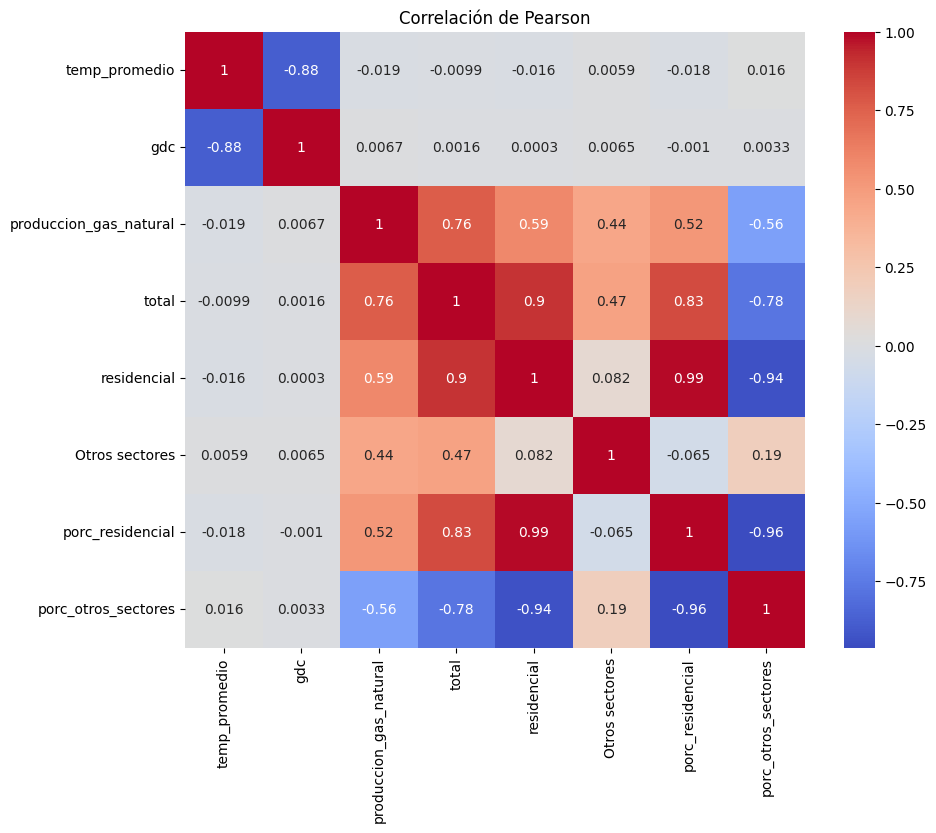

In [31]:
corr= df_gas.corr(numeric_only=True, method= 'pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación de Pearson')
plt.show()

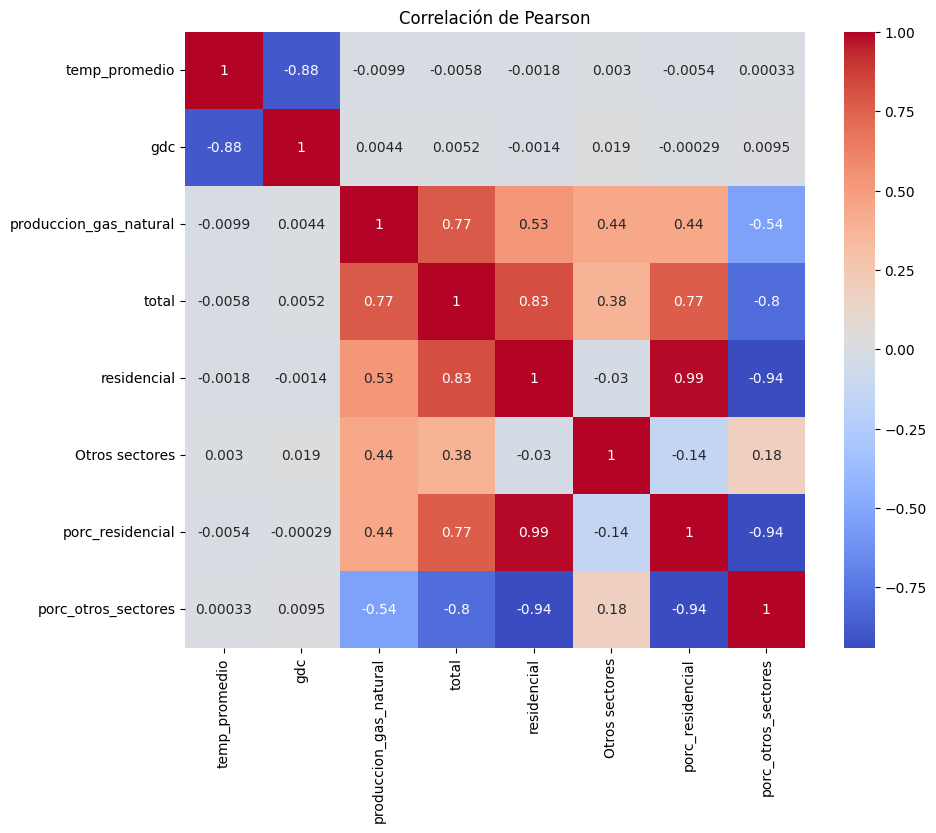

In [32]:
corr= df_gas.corr(numeric_only=True, method= 'spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación de Pearson')
plt.show()

#Informe EDA
El informe detallado del eda se encuentra en el repositorio